# Homework 8: Decision Tree Classification and Visualization

In [2]:
from sklearn.datasets import load_wine
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import otter
grader = otter.Notebook()
import random
import copy

# Set random seeds for reproducibility of random operations!
np.random.seed(42)
random.seed(42)

In [3]:
# First we load the wine dataset.
data = load_wine()

# Problem 1
## Put the data into a dataframe and visualize it

In [4]:
df =  pd.DataFrame(data = data.data, columns = data.feature_names)
df['target'] = data.target
grader.check('q1')

All tests passed!

# Problem 2
## Create a decision tree classifer for this data.
## Note: For all problems, set the random_state to 42 in the train_test_split method, and use a train test split of 85/15.

In [5]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [6]:
 y = df['target']

In [7]:
X = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]

Test Accuracy:  0.9259259259259259


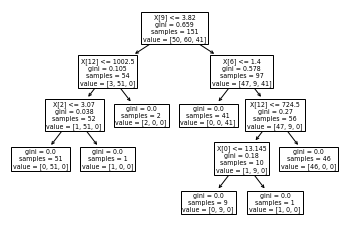

All tests passed!

In [8]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
tree1 = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

score = metrics.accuracy_score(y_test, y_pred)
print('Test Accuracy: ', score)
sklearn.tree.plot_tree(tree1)
plt.show()
grader.check('q2')


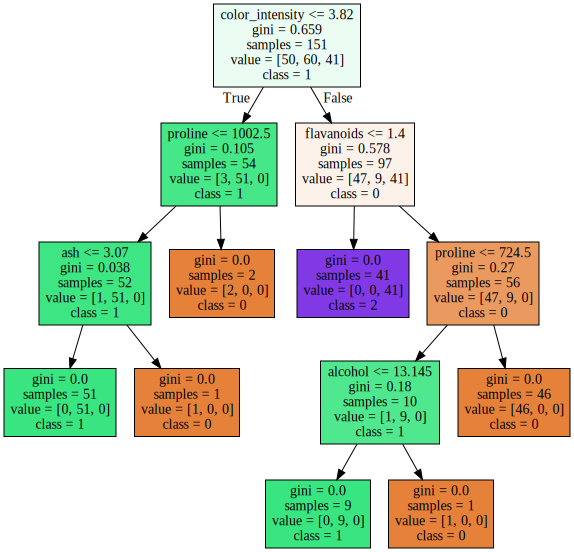

In [9]:
# Note that this tree is hard to read. So we're going to display it in a better way with graphviz.

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=data.feature_names, class_names=['0', '1', '2'], filled = True))
display(SVG(graph.pipe(format='svg')))

# Problem 3
## Create a decision tree classifer that splits based on the entropy criterion, rather than the Gini coefficient.

Test Accuracy:  0.8888888888888888


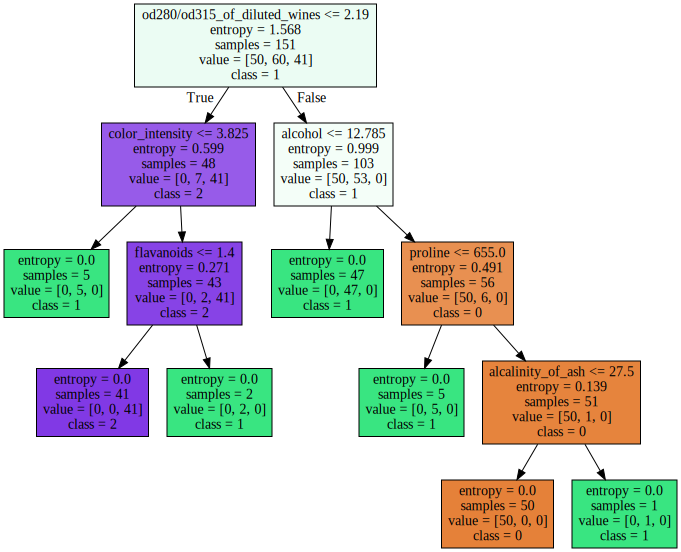

All tests passed!

In [10]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion = 'entropy')

# Train Decision Tree Classifer
tree2 = clf2.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(x_test)

score = metrics.accuracy_score(y_test, y_pred)
print('Test Accuracy: ', score)

graph = Source(tree.export_graphviz(clf2, out_file=None, feature_names=data.feature_names, class_names=['0', '1', '2'], filled = True))
display(SVG(graph.pipe(format='svg')))

grader.check('q3')

# Problem 4
## Remove the feature at the root of the decision tree, and create a new classifier based on this new feature set. Compare the accuracies between the two models.

In [11]:
Xnew = X.copy()
Xnew.drop(columns = ['od280/od315_of_diluted_wines'], inplace = True)

x_train, x_test, y_train, y_test = train_test_split(Xnew, y, test_size = 0.15, random_state=42) 

clf3 = DecisionTreeClassifier(criterion = 'entropy')

# Train Decision Tree Classifer
tree3 = clf3.fit(x_train,y_train)

score = clf3.score(x_test, y_test)
print('Test Accuracy: ', score)
grader.check('q4a')

Test Accuracy:  0.9629629629629629


All tests passed!

# Problem 4b
## Remove the 'hue' feature (which should be a leave of your tree), and create a new classifier based on this new feature set. Compare the accuracies between the two models.

In [12]:
Xnew

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,840.0


In [14]:
Xnew2 = X.copy()
Xnew2.drop(columns = ['hue'], inplace = True)

x_train, x_test, y_train, y_test = train_test_split(Xnew2, y, test_size = 0.15, random_state=42) 

clf4 =  DecisionTreeClassifier(criterion = 'entropy')

# Train Decision Tree Classifer
tree4 = clf4.fit(x_train,y_train)

score = clf4.score(x_test, y_test)
print('Test Accuracy: ', score)

grader.check('q4b')

Test Accuracy:  0.8888888888888888


All tests passed!

# Problem 5

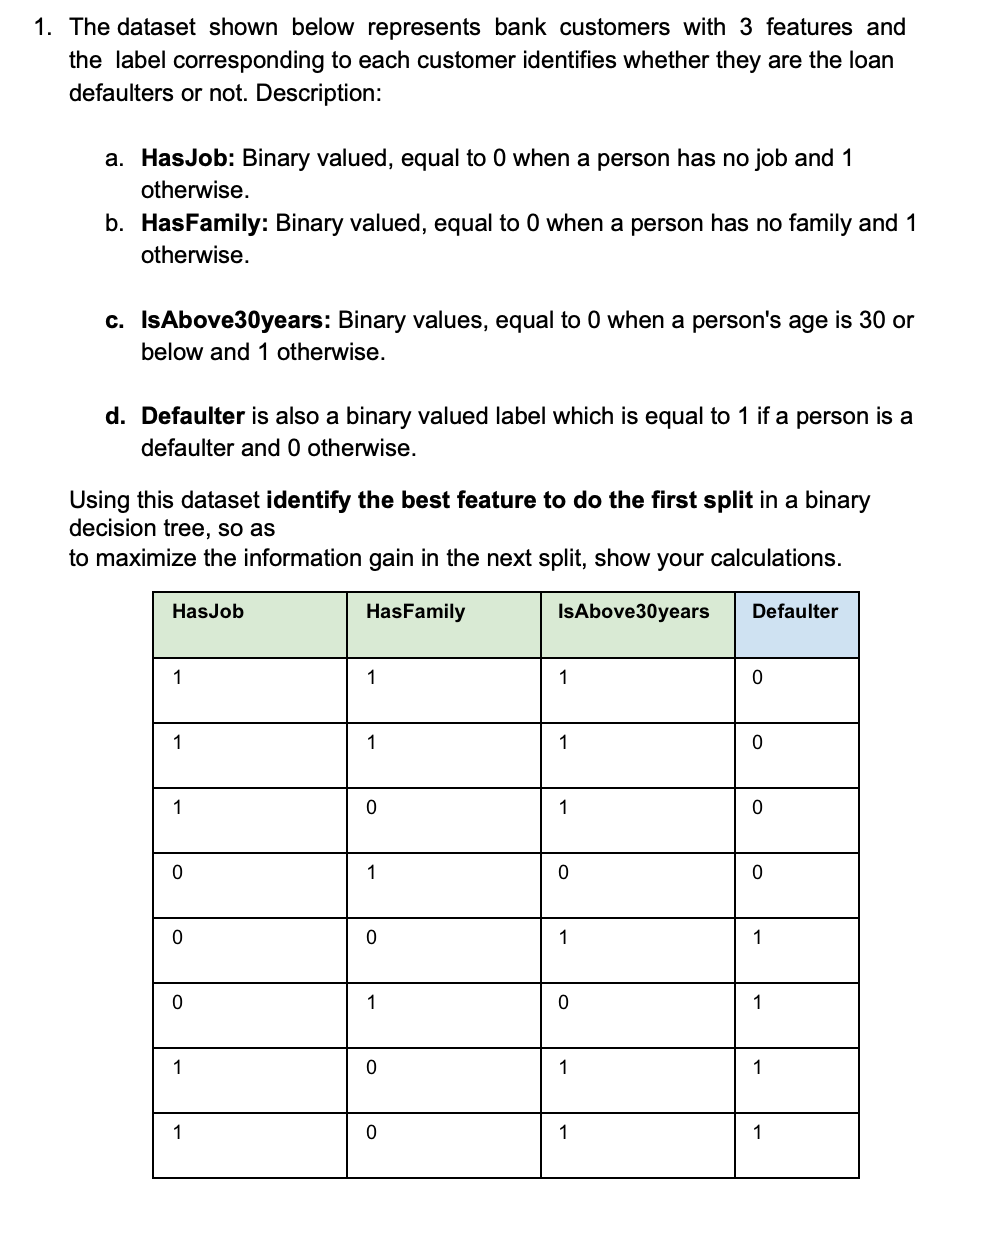

In [47]:
# Store the feature in the variable below:

# Entropy Calculation
def H(percentY,percentN):
    return -percentY * np.log(percentY) - percentN * np.log(percentN)

#Information Gain
# I(A) = H(percentY,percentX) - EH(A)
# I(A) = 1 - EH(A)

#Select attribute with largest I


#IG for HasJob
# IG_HasJob = 1 - [(percentJob) * Entropy(Job) - (percentNoJob) * Entropy(NoJob)]
IG_HasJob = 1 - ((5/8) * H(2/5,3/5) + (3/8) * H(2/3,1/3))
print(IG_HasJob)

#IG for HasFamily
IG_HasFam = 1 - ((4/8) * H(1/4,3/4) + (4/8) * H(3/4,1/4))
print(IG_HasFam)

#IG for >30
IG_30= 1 - ((6/8) * H(3/6,3/6) + (2/8) * H(1/2,1/2))
print(IG_30)


bestfeature = 'HasFamily'

0.3406748950086599
0.4376648553811917
0.3068528194400547


# Problem 6
## Entropy

Suppose there are three symbols A, B, and C, where are emitted with probability P(A)=.7, P(B)=.2, P(C)=.1. For example the string 'BAC' has probability .7*.2*.1=.014. If this process emits another symbol, 'BAC?', what is the entropy of that symbol?

In [13]:
# Store in the variable below:
entropy = -0.7*np.log2(0.7)-0.2*np.log2(0.2)-0.1*np.log2(0.1) 
print (entropy)

1.1567796494470395
